# Data Pre-Processing


It Contains several steps like :


- Data Collection
- Data Import
- Data Inspection
- Data Splitting
- Resizing image data

In [1]:
#import libraries
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam #optimizer is use to minimize the loss function
from keras.callbacks import ModelCheckpoint #When training deep learning models, the checkpoint is the weights of the model.                                            
import matplotlib.pyplot as plt                #These weights can be used to make predictions

In [2]:
keras.__version__

'2.4.3'

In [3]:
# this is the augmentation configuration we will use for training data
# It generate more images using below parameters
#Rescale : One of many augmentation parameters, adjusts the pixel values of our image,
#Setting rescale=1./255 will adjust our pixel values to be between 0–1.
training_datagen = ImageDataGenerator(rescale=1./255, 
                                      rotation_range=40, #Int, Degree range for random rotations
                                      width_shift_range=0.2, #its 20 % width shift range
                                      height_shift_range=0.2,
                                      shear_range=0.2, #Shear angle in counter-clockwise direction in degrees)
                                      zoom_range=0.2,
                                      horizontal_flip=True, #Boolean. Randomly flip inputs horizontally
                                      fill_mode='nearest') #One of {"constant", "nearest", "reflect" or
                                                           # "wrap"}. Default is 'nearest'. 
                                                           

In [4]:
# this is a generator that will read pictures found 
#at train_data_path, and indefinitely generate batches of augmented image data.
training_data = training_datagen.flow_from_directory('data/train/', # this is the target directory
                                      target_size=(150, 150), #all images will be resized to 150x150
                                      batch_size=32, #Number of images to include in each batch of training data 
                                      class_mode='binary')  # since we use binary_crossentropy loss, 
                                                            #we need binary labels.
 
training_data.class_indices

Found 1951 images belonging to 4 classes.


{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

In [5]:
# this is the augmentation configuration we will use for validation:
# here, we have done only rescaling. 
valid_datagen = ImageDataGenerator(rescale=1./255)
 
# this is a similar generator, for validation data
valid_data = valid_datagen.flow_from_directory('data/val/',
                                  target_size=(150,150),
                                  batch_size=32,
                                  class_mode='binary')

Found 324 images belonging to 4 classes.


In [6]:
def plotImages(images_arr): #then we created a function for plotting our argumented images
    fig, axes = plt.subplots(1, 5, figsize=(20, 20)) #here we're plotting 5 images of size 20x20
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

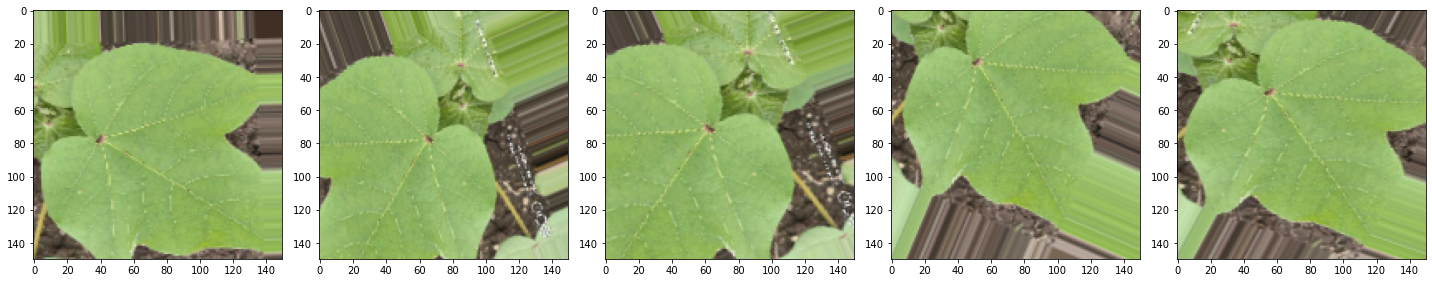

In [7]:
# showing augmented images
images = [training_data[0][0][0] for i in range(5)] #in this we can see some diseased/non diseased cotton leaf images
plotImages(images) #calling our function that we have created earlier 

# Feature Extraction

##### In Traditional Machine Learning
 Input Image >> Feature Selections >> Classifier >> Result 

##### In Deep Learning
 Input Image >> Neural Network >> Result

   #### For CNN
 Input Layer >> Hidden Layers >> Output
>> Here, input layer takes the input and output gives the desired output.
>> That means hidden layer is doing some feature extractions.
>> And if we extract the outputs of the hidden layers, then we will get different features. 

So basically, In ML we have to create our own feature vector, 
while for DL algorithms they extract features automatically in convolution layers.

<img src="Figures/CNN-feature-extraction-and-classification.png">

#### A CNN is composed of two basic parts of feature extraction and classification. 

- Feature extraction includes several convolution layers followed by max-pooling and an activation function.


- The classifier usually consists of fully connected layers. 


- CNN automatically detects the important features without any human supervision


- And it makes efficient model which performs automatic feature extraction to achieve superhuman accuracy


## Convolutional Neural Network

<img src="Figures/convolutional-neural-network.png">

# CNN Model Building Details :
- The main building block of CNN is the convolutional layer.

- Convolution is a mathematical operation to merge two sets of information. 
- In our case the convolution is applied on the input data using a convolution filter 
  to produce a feature map.
- After a convolution operation we usually perform pooling to reduce the dimensionality. 
  This enables us to reduce the number of parameters, 
  which both shortens the training time and combats overfitting. 
- Pooling layers downsample each feature map independently, reducing the height and width.

- The output of both convolution and pooling layers are 3D volumes, 
  but a fully connected layer expects a 1D vector of numbers. 
- So we flatten the output of the final pooling layer to a vector 
  and that becomes the input to the fully connected layer. 
- Flattening is simply arranging the 3D volume of numbers into a 1D vector.

<img src="Figures/maxpooling.png">

In [8]:
# save best model using vall accuracy
model_path = 'model/v6_pred_cott_dis.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [9]:

#Building cnn model
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[150, 150, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),

                                    keras.layers.Dropout(0.5),                                                                        
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=4, activation='softmax') # output layer
])


# compile cnn model
cnn_model.compile(optimizer = Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 256)       2

In [11]:
# train cnn model
history = cnn_model.fit(training_data, 
                          epochs=100,  
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list)

Epoch 1/100
61/61 [==============================] - ETA: 0s - loss: 1.2453 - accuracy: 0.4387
Epoch 00001: val_accuracy improved from -inf to 0.42284, saving model to model\v6_pred_cott_dis.h5
61/61 [==============================] - 76s 1s/step - loss: 1.2453 - accuracy: 0.4387 - val_loss: 1.2785 - val_accuracy: 0.4228
Epoch 2/100
61/61 [==============================] - ETA: 0s - loss: 1.0738 - accuracy: 0.5428
Epoch 00002: val_accuracy improved from 0.42284 to 0.52778, saving model to model\v6_pred_cott_dis.h5
61/61 [==============================] - 59s 968ms/step - loss: 1.0738 - accuracy: 0.5428 - val_loss: 0.9787 - val_accuracy: 0.5278
Epoch 3/100
61/61 [==============================] - ETA: 0s - loss: 0.9631 - accuracy: 0.6017
Epoch 00003: val_accuracy improved from 0.52778 to 0.55864, saving model to model\v6_pred_cott_dis.h5
61/61 [==============================] - 58s 955ms/step - loss: 0.9631 - accuracy: 0.6017 - val_loss: 0.9220 - val_accuracy: 0.5586
Epoch 4/100
61/61 [

Epoch 29/100
61/61 [==============================] - ETA: 0s - loss: 0.4367 - accuracy: 0.8309
Epoch 00029: val_accuracy improved from 0.82407 to 0.87037, saving model to model\v6_pred_cott_dis.h5
61/61 [==============================] - 63s 1s/step - loss: 0.4367 - accuracy: 0.8309 - val_loss: 0.3161 - val_accuracy: 0.8704
Epoch 30/100
61/61 [==============================] - ETA: 0s - loss: 0.4586 - accuracy: 0.8124
Epoch 00030: val_accuracy did not improve from 0.87037
61/61 [==============================] - 62s 1s/step - loss: 0.4586 - accuracy: 0.8124 - val_loss: 0.4935 - val_accuracy: 0.8056
Epoch 31/100
61/61 [==============================] - ETA: 0s - loss: 0.3977 - accuracy: 0.8524
Epoch 00031: val_accuracy improved from 0.87037 to 0.87654, saving model to model\v6_pred_cott_dis.h5
61/61 [==============================] - 61s 995ms/step - loss: 0.3977 - accuracy: 0.8524 - val_loss: 0.3102 - val_accuracy: 0.8765
Epoch 32/100
61/61 [==============================] - ETA: 0s -

Epoch 86/100
61/61 [==============================] - ETA: 0s - loss: 0.2540 - accuracy: 0.9042
Epoch 00086: val_accuracy did not improve from 0.95062
61/61 [==============================] - 61s 1s/step - loss: 0.2540 - accuracy: 0.9042 - val_loss: 0.1522 - val_accuracy: 0.9444
Epoch 87/100
61/61 [==============================] - ETA: 0s - loss: 0.2338 - accuracy: 0.9088
Epoch 00087: val_accuracy did not improve from 0.95062
61/61 [==============================] - 63s 1s/step - loss: 0.2338 - accuracy: 0.9088 - val_loss: 0.2014 - val_accuracy: 0.9228
Epoch 88/100
61/61 [==============================] - ETA: 0s - loss: 0.2406 - accuracy: 0.9159
Epoch 00088: val_accuracy did not improve from 0.95062
61/61 [==============================] - 63s 1s/step - loss: 0.2406 - accuracy: 0.9159 - val_loss: 0.1266 - val_accuracy: 0.9506
Epoch 89/100
61/61 [==============================] - ETA: 0s - loss: 0.2760 - accuracy: 0.9006
Epoch 00089: val_accuracy did not improve from 0.95062
61/61 [==

In [14]:
history.history

{'loss': [1.2452812194824219,
  1.0738482475280762,
  0.9630753397941589,
  0.8810494542121887,
  0.8633837103843689,
  0.847642719745636,
  0.7974811792373657,
  0.7956979870796204,
  0.7940321564674377,
  0.7421563267707825,
  0.7509011030197144,
  0.6562079191207886,
  0.695482075214386,
  0.6426442265510559,
  0.585283637046814,
  0.586726188659668,
  0.5415681600570679,
  0.5849131345748901,
  0.48385095596313477,
  0.5085071921348572,
  0.5046623945236206,
  0.5065722465515137,
  0.45716479420661926,
  0.4705512225627899,
  0.47933244705200195,
  0.44325682520866394,
  0.43155065178871155,
  0.41692233085632324,
  0.43671080470085144,
  0.4586322009563446,
  0.3976648151874542,
  0.4054938852787018,
  0.4086318612098694,
  0.3650800883769989,
  0.3895370364189148,
  0.38010600209236145,
  0.39381521940231323,
  0.3866879642009735,
  0.36445051431655884,
  0.3565247654914856,
  0.33334624767303467,
  0.3579578399658203,
  0.36862337589263916,
  0.33503666520118713,
  0.34337726235

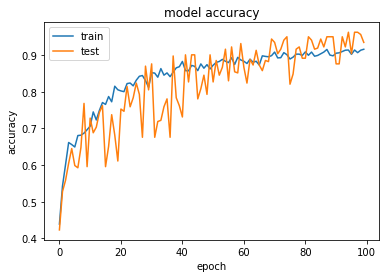

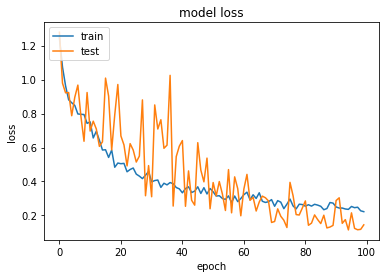

In [15]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()